# Homework 2 (Part 2): Spectral clustering


<span style="color: red; font-size: 14pt">Soft deadline: 15.12.2022</span>

<span style="color: red; font-size: 14pt">Hard deadline: 16.12.2022 </span>

**Requirements**: 

- The report shoulbe in a file: ``MMDA2022-HW1-p2-Spectral_<your_full_name>.ipynb``;
- It should be sent to dmitrii.ignatov@gmail.com (Dmitry Ignatov: the lecturer) and futurelifestefan@gmail.com (Stefan Nikolić: TA) with the topic [MMDA2022-HW1-p2-Spectral]-your_full_name.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In this exercise we follow graph clustering example from David Gleich's tutorial: https://www.dropbox.com/s/w06niyzfe2r8y90/tutorial.pdf?dl=0.

### 1 (Warm up). Finding a partition (0%)
Generate a graph repsresnted by its adjecency matrix that consists of two communities.

In [3]:
# the number of vertices
# (each vertex is an individual actor, for example, a person with certain political views, e.g. republican or democrat

n = 1000

# an array of n vertices
x = np.arange(n)

# random permutations
np.random.shuffle(x)

# the size of the first group
gs = 450

# let us select gs group members to the first group
group1 = x[:gs]

# and n-gs representatives to the second one
group2 = x[gs:]

# the probability of connection within the first group
p_group1 = 0.5

# the probability of connection within the second group
p_group2 = 0.4

# intergroup connections
p_between = 0.1

# initialistion of the adjacency matrix nxn
A = np.zeros([n, n])

In [2]:
n = 1000

In [3]:
x = np.arange(n)

In [4]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [5]:
np.random.shuffle(x)

In [8]:
x

array([670, 877, 290, 673, 338, 994, 247, 578, 706, 780, 370, 701,  84,
       642, 626,  16, 366, 985, 511, 484, 283, 349, 423, 691, 840,  31,
       129, 430, 270, 758, 451, 200, 789, 477, 530,  18, 412, 723, 480,
       100, 343, 236,  66, 261, 433, 805, 193, 418, 464, 248, 199, 497,
       376, 778, 815, 262, 717, 483, 145,  41, 608, 440, 402, 826, 274,
       434, 421,  20,  55,  91, 369, 583,  19, 639, 822, 690, 885, 910,
       610, 267, 684, 874, 790, 246, 728,  38, 603, 726, 786, 631, 982,
       194, 901, 264, 565, 899, 587, 147, 479, 321, 447, 591, 959, 737,
       568, 628, 181, 515, 184, 285, 345, 168, 577, 917, 900, 879, 909,
       641, 332, 368, 566, 108, 963, 551, 836, 404, 677,  22, 683, 890,
       481, 884, 271, 143, 624, 520, 475, 793, 685, 883, 644, 278, 855,
        92, 699, 556, 674, 486, 586,  40, 830, 507, 131, 798, 286, 742,
       941, 104, 133, 666, 465, 847, 456, 211, 234, 251, 113,  93, 671,
       455, 490, 550, 435, 979, 210, 539, 763, 308, 508, 195, 57

In [6]:
# the size of the first group
gs = 450

# let us select gs group members to the first group
group1 = x[:gs]

In [10]:
len(group1)

450

In [9]:
len(group1)

450

In [7]:
# and n-gs representatives to the second one
group2 = x[gs:]

In [11]:
# the probability of connection within the first group
p_group1 = 0.5

# the probability of connection within the second group
p_group2 = 0.4

# intergroup connections
p_between = 0.1

# initialistion of the adjacency matrix nxn
A = np.zeros([n, n])

In [12]:
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
assert A.shape == (1000, 1000)

In [16]:
# adjecency submatrix for the first group
A[np.ix_(group1, group1)].shape

(450, 450)

In [18]:
np.random.rand(gs, gs) < p_group1

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True, False,  True, ...,  True,  True,  True],
       [ True,  True,  True, ..., False, False,  True],
       ...,
       [False, False, False, ...,  True,  True, False],
       [ True,  True, False, ..., False, False, False],
       [False,  True,  True, ...,  True,  True,  True]])

In [17]:
np.random.rand(gs, gs) 

array([[0.27393106, 0.60483707, 0.72480138, ..., 0.49478541, 0.35738992,
        0.08508888],
       [0.6648394 , 0.25954306, 0.55870278, ..., 0.16350004, 0.03664544,
        0.89626978],
       [0.72602014, 0.86026675, 0.25929205, ..., 0.74927229, 0.19672294,
        0.00813068],
       ...,
       [0.14399542, 0.80655488, 0.19841704, ..., 0.31393711, 0.49623613,
        0.6960609 ],
       [0.06199674, 0.88715434, 0.72628456, ..., 0.20674425, 0.23826912,
        0.9543632 ],
       [0.44767448, 0.50273068, 0.13432612, ..., 0.95160589, 0.7153013 ,
        0.23307771]])

In [19]:
# generation of connections in the first group
A[np.ix_(group1, group1)] = np.random.rand(gs, gs) < p_group1

# generation of connections in the second group
A[np.ix_(group2, group2)] = np.random.rand(n-gs, n-gs) < p_group2

# genegation of intergroup connections
A[np.ix_(group1, group2)] = np.random.rand(gs, n-gs) < p_between

# we need a symmetric matrix for modeling "friendship relationship"
# and cut the upper triangle matrix
A = np.triu(A,1)


# let us transpose it and add to the upper triangle matrix
A = A + A.T

In [19]:
# generation of connections in the first group
A[np.ix_(group1, group1)] = np.random.rand(gs, gs) < p_group1

# generation of connections in the second group
A[np.ix_(group2, group2)] = np.random.rand(n-gs, n-gs) < p_group2

# genegation of intergroup connections
A[np.ix_(group1, group2)] = np.random.rand(gs, n-gs) < p_between



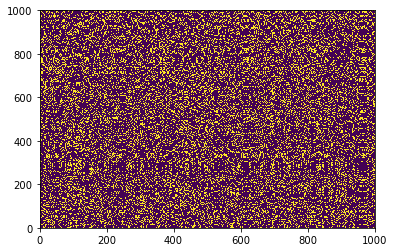

In [20]:
plt.pcolormesh(A)

In [21]:
A = np.triu(A,1)

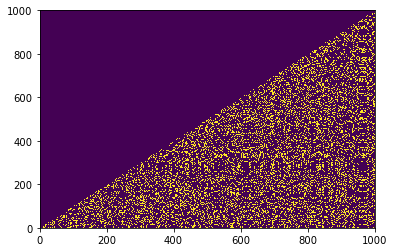

In [24]:
plt.pcolormesh(A)

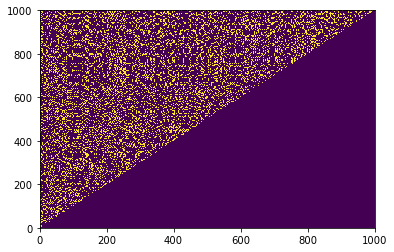

In [25]:
plt.pcolormesh(A.T)

In [26]:
A=A+A.T

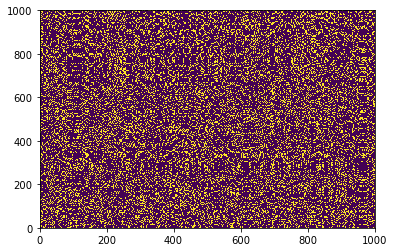

In [27]:
plt.pcolormesh(A)

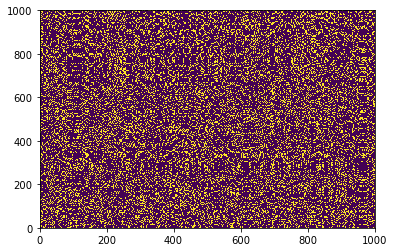

In [28]:
# let us have a look (it seems, the structure is absent)
plt.pcolormesh(A);

True

In [35]:
#checking the symmetry
sum(sum(np.abs(A-A.T)))

0.0

In [36]:
#cheking the main diagonal -- it should be empty
sum(np.diag(A))

0.0

Follow the hints from the tutorial. First, calculate the Laplacian matrix, L=D-A, find its second smallest eigenvector, sort it, and use the found indicies and restore the model structure as the two group of  "friends".

In [37]:
D=np.diag(sum(A))

In [40]:
min(sum(A))

178.0

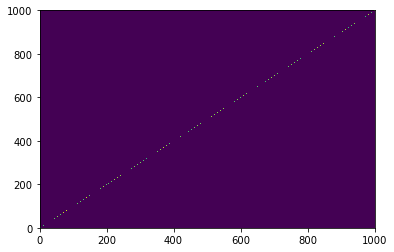

In [41]:
plt.pcolormesh(D);

In [42]:
L=D-A

In [44]:
from scipy.sparse.linalg import eigsh #a better choice than numpy

In [47]:
import scipy
help(scipy.sparse.linalg.eigsh)

Help on function eigsh in module scipy.sparse.linalg.eigen.arpack.arpack:

eigsh(A, k=6, M=None, sigma=None, which='LM', v0=None, ncv=None, maxiter=None, tol=0, return_eigenvectors=True, Minv=None, OPinv=None, mode='normal')
    Find k eigenvalues and eigenvectors of the real symmetric square matrix
    or complex Hermitian matrix A.
    
    Solves ``A * x[i] = w[i] * x[i]``, the standard eigenvalue problem for
    w[i] eigenvalues with corresponding eigenvectors x[i].
    
    If M is specified, solves ``A * x[i] = w[i] * M * x[i]``, the
    generalized eigenvalue problem for w[i] eigenvalues
    with corresponding eigenvectors x[i].
    
    Note that there is no specialized routine for the case when A is a complex
    Hermitian matrix. In this case, ``eigsh()`` will call ``eigs()`` and return the
    real parts of the eigenvalues thus obtained.
    
    Parameters
    ----------
    A : ndarray, sparse matrix or LinearOperator
        A square operator representing the operation ``

In [48]:
#W,V=np.linalg.eigh(L)

In [49]:
W,V=eigsh(L,which='SA') #six (by default) eignvalues are sorted in desceding order (by which='SA')

In [50]:
W.shape

(6,)

In [36]:
W

array([9.43454055e-15, 4.61281076e+01, 1.94073255e+02, 1.95708249e+02,
       1.96002661e+02, 1.96658632e+02])

In [53]:
V[:,1]

array([-0.02646778, -0.02551573, -0.02654554,  0.03561845, -0.02475164,
       -0.02793104, -0.02628675,  0.0349672 ,  0.03505671, -0.02811831,
        0.03685425,  0.03421477,  0.03475279,  0.03366735,  0.03409828,
        0.03477026, -0.0263829 , -0.02673524,  0.03497583, -0.02501351,
        0.03401646, -0.02308503,  0.03520983,  0.0339452 , -0.02535132,
        0.03487783,  0.03443812,  0.03354319, -0.02645851,  0.03477921,
       -0.02828716, -0.02402382, -0.02773793,  0.03497679,  0.03469651,
        0.03439932, -0.02619893,  0.03434091, -0.02609461,  0.03539561,
       -0.02930308, -0.02796763, -0.02283379,  0.03454142, -0.02639907,
        0.03418988, -0.02510184,  0.03477916, -0.02677494, -0.02810743,
        0.0333551 , -0.02717259,  0.03396058,  0.03521551, -0.02650249,
        0.03380698,  0.03542961, -0.02846482, -0.02872546,  0.0345022 ,
        0.03372336, -0.02860776, -0.02642716,  0.03451337, -0.02632383,
        0.0330232 ,  0.03373047,  0.03445911,  0.032982  , -0.02

In [54]:
min(W),max(W)

(-5.555028022724528e-15, 196.8823203848625)

In [55]:
W

array([-5.55502802e-15,  4.25671101e+01,  1.76032818e+02,  1.78353227e+02,
        1.94511656e+02,  1.96882320e+02])

In [56]:
V[:,0] #the first samllest eigenvalue corresponds to the first eigenvector – should be a constant vector k*e, where e=(1,1,...,1), where k=sqrt(1/n)

array([0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162

In [58]:
from math import sqrt

In [59]:
sqrt(1/1000)

0.03162277660168379

In [60]:
X=V[:,1] #the second smallest eigenvalue corresponds to the second eigenvector
Y=V[:,2]

In [61]:
Ids1=np.argsort(X)
Ids2=np.argsort(Y)

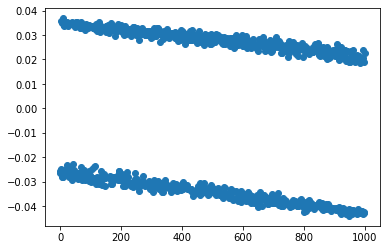

In [67]:
plt.plot(X,"o") #original X

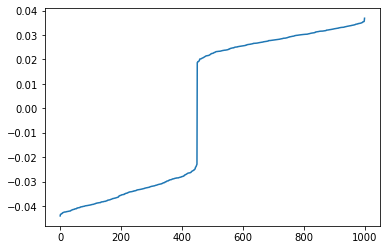

In [68]:
plt.plot(X[Ids1])

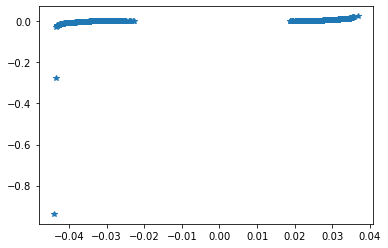

In [71]:
plt.plot(X[Ids1],Y[Ids2],"*") #sorted X

In [75]:
sum(np.dot(L,X)) #the result is non-zero

2.2382096176443156e-13

In [73]:
sum(np.dot(L,V[:,0])) #due to numerical instability the result is non-zero for the first vector too

-4.200195746761892e-12

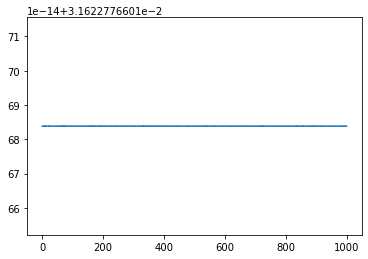

In [76]:
plt.plot(V[:,0]) # but it does not suite our purpose

In [77]:
B=A[Ids1,:]#let us sort our matrix according to the new order of the second vector components; first, by rows

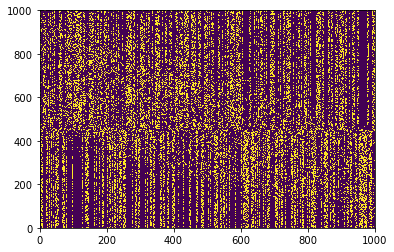

In [78]:
plt.pcolormesh(B)

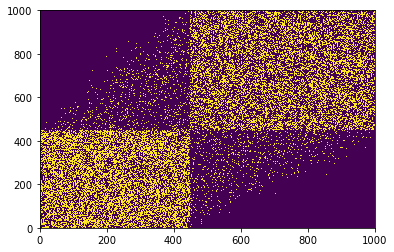

In [79]:
plt.pcolormesh(B[:,Ids1]) #second, by columns; we identified our communities

In [81]:
e=np.ones(1000) #just for curiosity, let us check the constant vector

In [82]:
e

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [83]:
np.dot(L,e) # it corresponds to zero eigenvalue

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [84]:
W[0] #even though due to numeric instability it is not zero in our method

-5.555028022724528e-15

### 2. Meaningful Partitions of Real Datasets (100%)
"The previous example was rather compelling. However, it was also fake."

We can play with real anonymised data from Yahoo https://www.dropbox.com/s/ii1e09dx6o2ktit/yahoo.zip?dl=0 for web advertisment.

In [88]:
# reading data, 2000 companies, 3000 advertising terms, 
# 92345 connections in the graph showing that a firm buys a term
a = np.genfromtxt('yahoo/us.3k.2k.smat')
a = a.astype(int)
n, m, n_connections = a[0]

In [89]:
a[1:10]

array([[  0,  23,   1],
       [  0,  96,   1],
       [  0, 188,   1],
       [  0, 328,   1],
       [  0, 556,   1],
       [  0, 632,   1],
       [  0, 672,   1],
       [  0, 700,   1],
       [  0, 714,   1]])

In [90]:
#let us put data in the adjacency matrix n x m
A_small = np.zeros((n, m))
A_small[a[1:, 0], a[1:, 1]] = 1

In [91]:
A = np.vstack(
    (np.hstack(
        (np.zeros((n, n)), A_small)
    ),
     np.hstack((A_small.T, np.zeros((m, m))))
    )
)

In [92]:
# let us calcualte the number of non-zero elements (connections)
assert sum(sum(A_small)) == 92345

In [93]:
# let us read terms along with their ids
with open("yahoo/us.3k.2k.trms", 'r') as iofile:
    labels = iofile.readlines()

In [94]:
labels

['12a1970 lexmark\n',
 '2 stacker\n',
 '21 black jack\n',
 '2nd mortgage\n',
 'acapulco hotel\n',
 'accept account card credit merchant\n',
 'accept card credit\n',
 'accept card credit online\n',
 'accessory computer\n',
 'accessory desk\n',
 'accommodation\n',
 'accommodation hotel\n',
 'accommodation las vegas\n',
 'accommodation new york\n',
 'accommodation orlando\n',
 'accommodation paris\n',
 'account card credit merchant\n',
 'account cost low merchant\n',
 'account ecommerce merchant\n',
 'account internet merchant\n',
 'account merchant\n',
 'account merchant online\n',
 'account merchant provider\n',
 'account merchant service\n',
 'acid alpha lipoic\n',
 'acid amino\n',
 'acid folic\n',
 'acne medication\n',
 'acura cl\n',
 'acyclovir\n',
 'ad banner\n',
 'ad personal\n',
 'add url\n',
 'address internet\n',
 'address web\n',
 'adds personal\n',
 'adipex\n',
 'adipex buy\n',
 'adipex buy online\n',
 'adipex cheap\n',
 'adipex diet\n',
 'adipex diet pill\n',
 'adipex line\n'

Perfrom the second task from the tutorial. First, calculate the Laplacian matrix, L=D-A, find its second smallest eigenvector, sort it, and use the found indicies to find interpretable clusters of advertising terms (2-3 such clusters is enough). As an alternative out-of-the-box solution, you can use the implementation of Spectral Clustering with a given number of clusters from scikit-learn: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

In [0]:
### Your code here